In [199]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb



In [200]:
# Display setting to better visualize notebook
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',10)
pd.set_option('display.width',1000)

In [201]:
# Read Aggregated  data
df = pd.read_csv('New_features.csv')

In [202]:
df.shape

(5410, 13)

In [203]:
df.head()

,Provider,IP_average_claim_duration,OP_average_claim_duration,PotentialFraud,IP_Claims_Total,OP_Claims_Total,IP_Averagedaysinhospital,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,IP_total_diagnosis,OP_total_diagnosis,IP_total_procedures,OP_total_procedures
0,PRV51001,5.0,1.0,No,97000.0,7640.0,5.0,890.0,475.0,36.0,44.0,3.0,0.0
1,PRV51003,5.0,2.0,Yes,573000.0,32670.0,5.0,823.0,665.0,503.0,190.0,48.0,0.0
2,PRV51004,0.0,1.0,No,0.0,52170.0,0.0,454.0,601.0,0.0,385.0,0.0,0.0
3,PRV51005,0.0,1.0,Yes,0.0,280910.0,0.0,399.0,476.0,0.0,3016.0,0.0,0.0
4,PRV51007,5.0,1.0,No,19000.0,14710.0,5.0,424.0,431.0,22.0,193.0,1.0,0.0


In [204]:
X=df.drop(columns=['Provider','PotentialFraud'])

In [205]:
X.shape

(5410, 11)

In [206]:
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

In [207]:
y

0       0
1       1
2       0
3       1
4       0
       ..
5405    0
5406    0
5407    0
5408    0
5409    0
Name: PotentialFraud, Length: 5410, dtype: int64

Accuracy: 0.9445
Precision: 0.7971
Recall: 0.5446
F1-score: 0.6471
ROC-AUC: 0.9576
Confusion Matrix:
 [[967  14]
 [ 46  55]]


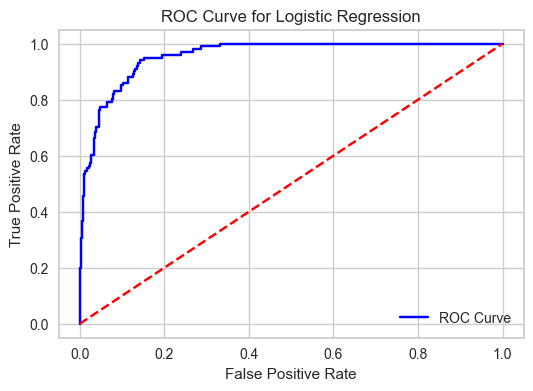

In [208]:
# Models Trainging ,Evaluation  and Features importances 
# 1. Logistic Regression

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print(f'Confusion Matrix:\n {conf_matrix}')

# Visualize the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Top 10 Most Important Features:
                      Feature  Importance
2            IP_Claims_Total    2.684817
7         IP_total_diagnosis    1.023278
8         OP_total_diagnosis    0.646377
0  IP_average_claim_duration    0.362121
3            OP_Claims_Total    0.266589
4   IP_Averagedaysinhospital    0.201957
5      IPAnnualDeductibleAmt    0.123028
9        IP_total_procedures    0.115706
1  OP_average_claim_duration    0.112896
6      OPAnnualDeductibleAmt    0.092417


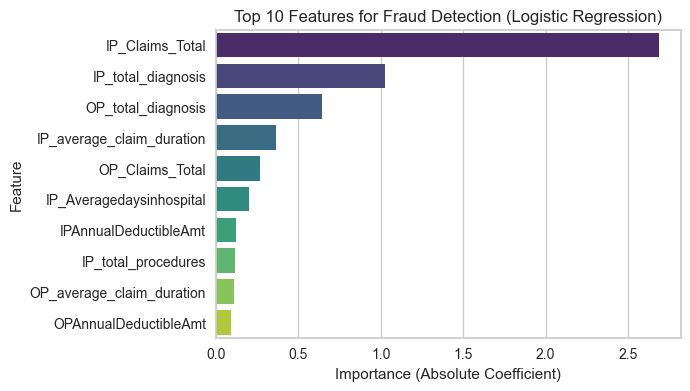

In [209]:
# Feature importance for Logistic Regression 
# Extract feature names
feature_names = X.columns

# Extract coefficients from trained Logistic Regression model
coefficients = log_reg.coef_[0]  # Coefficients for binary classification

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': abs(coefficients)})

# Sort features by importance (absolute coefficient values) in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
top_10_features = feature_importance_df.head(10)
print("Top 10 Most Important Features:\n", top_10_features)

# Plot the top 10 features
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Features for Fraud Detection (Logistic Regression)')
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.show()

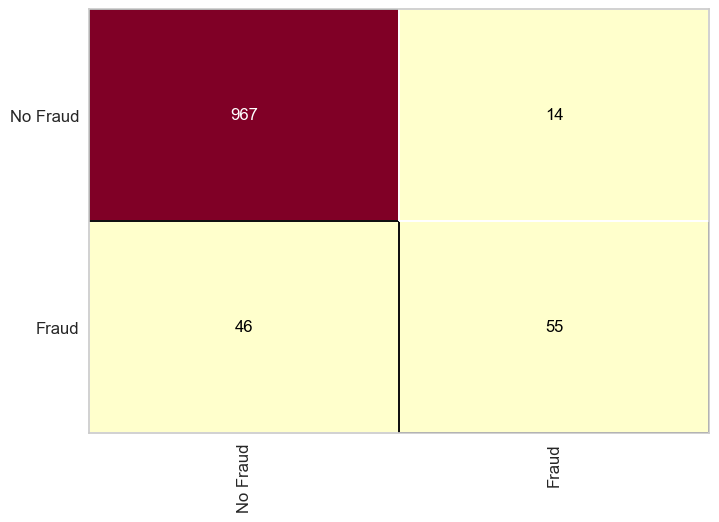

In [210]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

# Initialize the confusion matrix visualizer
cm_viz = ConfusionMatrix(log_reg, classes=['No Fraud', 'Fraud'])
# Fit and evaluate the model
cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)

# Show the plot
plt.show()

Accuracy: 0.9418
Precision: 0.7794
Recall: 0.5248
F1-score: 0.6272
ROC-AUC: 0.9042
Confusion Matrix:
 [[966  15]
 [ 48  53]]


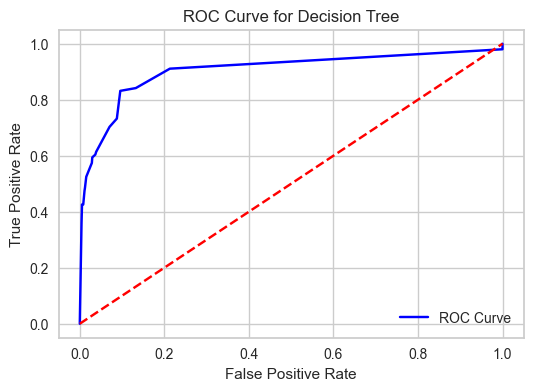

In [211]:
# 2. Decision tree model

# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # You can tune hyperparameters like max_depth
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print(f'Confusion Matrix:\n {conf_matrix}')

# Visualize the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


Top 10 Most Important Features:
                      Feature  Importance
0            IP_Claims_Total    0.727154
1            OP_Claims_Total    0.132989
2         OP_total_diagnosis    0.045830
3      OPAnnualDeductibleAmt    0.029828
4         IP_total_diagnosis    0.021179
5   IP_Averagedaysinhospital    0.019968
6      IPAnnualDeductibleAmt    0.011528
7  IP_average_claim_duration    0.011526
8  OP_average_claim_duration    0.000000
9        IP_total_procedures    0.000000


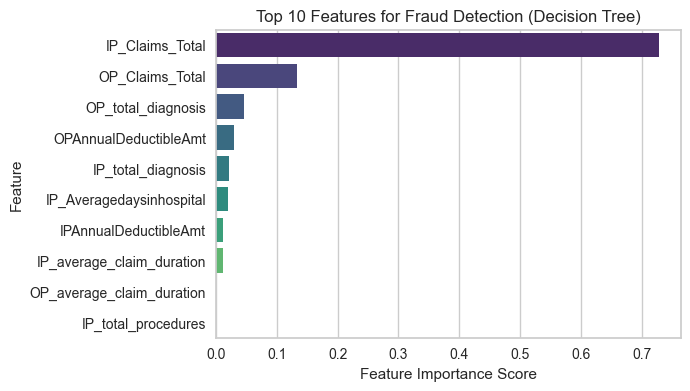

In [212]:
# Feature importance for Decision Tree
# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Extract feature importance from Decision Tree
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)

# Sort features by importance in descending order
feature_importance_df = feature_importances.sort_values(ascending=False).reset_index()
feature_importance_df.columns = ['Feature', 'Importance']

# Display the top 10 important features
top_10_features = feature_importance_df.head(10)
print("Top 10 Most Important Features:\n", top_10_features)

# Plot the top 10 features
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Features for Fraud Detection (Decision Tree)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

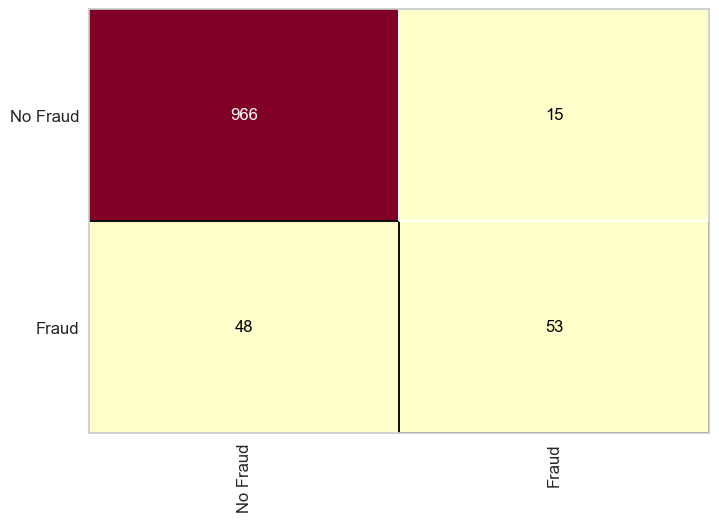

In [213]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

# Initialize the confusion matrix visualizer
cm_viz = ConfusionMatrix(dt_model, classes=['No Fraud', 'Fraud'])

# Fit and evaluate the model
cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)

# Show the plot
plt.show()

Accuracy: 0.9418
Precision: 0.7500
Recall: 0.5644
F1-score: 0.6441
ROC-AUC: 0.9448
Confusion Matrix:
 [[962  19]
 [ 44  57]]


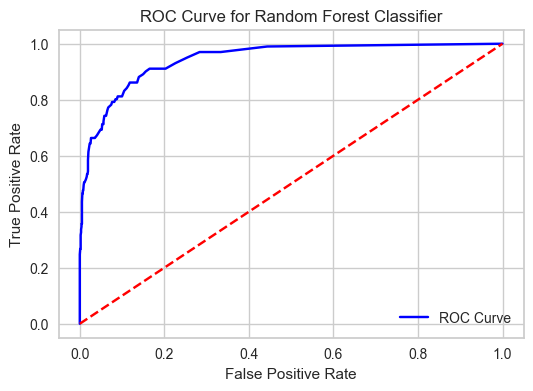

In [214]:
# 3. Random Forest model 

# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

# Combine transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train Random Forest model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

model.fit(X_train, y_train)

# Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate model performance with different classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print(f'Confusion Matrix:\n {conf_matrix}')

# Visualize the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

Top 10 Most Important Features:
                      Feature  Importance
0            IP_Claims_Total    0.290596
1         IP_total_diagnosis    0.221514
2        IP_total_procedures    0.161767
3         OP_total_diagnosis    0.094052
4            OP_Claims_Total    0.087680
5  IP_average_claim_duration    0.056306
6   IP_Averagedaysinhospital    0.041815
7      OPAnnualDeductibleAmt    0.021522
8      IPAnnualDeductibleAmt    0.016084
9        OP_total_procedures    0.005402


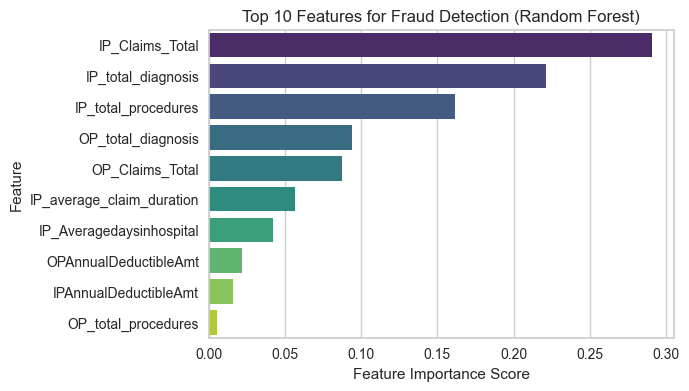

In [215]:
# Feature importance for Random Forest  model

# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort features by importance in descending order
feature_importance_df = feature_importances.sort_values(ascending=False).reset_index()
feature_importance_df.columns = ['Feature', 'Importance']

# Display the top 10 important features
top_10_features = feature_importance_df.head(10)
print("Top 10 Most Important Features:\n", top_10_features)

# Plot the top 10 features
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis',hue='Feature',legend=False)
plt.title('Top 10 Features for Fraud Detection (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

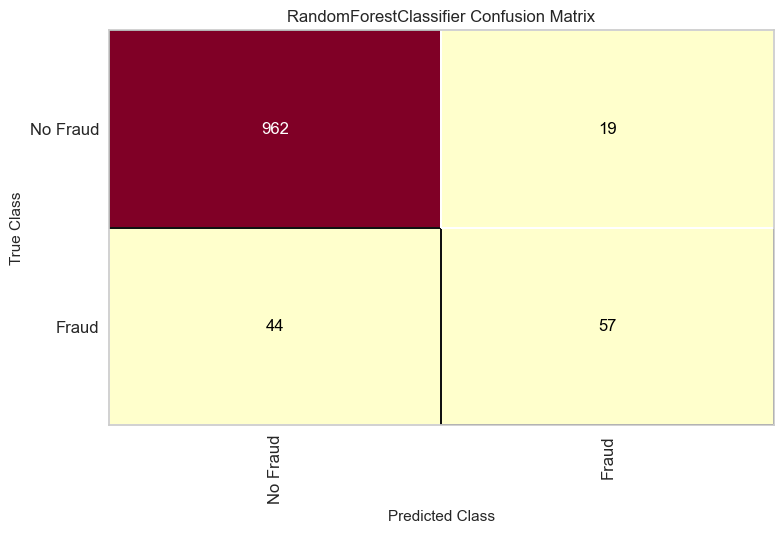

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [216]:
#Visualization
# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train Random Forest model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

model.fit(X_train, y_train)

# Visualize the confusion matrix
cm_viz = ConfusionMatrix(model, classes=['No Fraud', 'Fraud'])
cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)
cm_viz.show()


Accuracy: 0.9344
Precision: 0.6705
Recall: 0.5842
F1-score: 0.6243
ROC-AUC: 0.9324
Confusion Matrix:
 [[952  29]
 [ 42  59]]


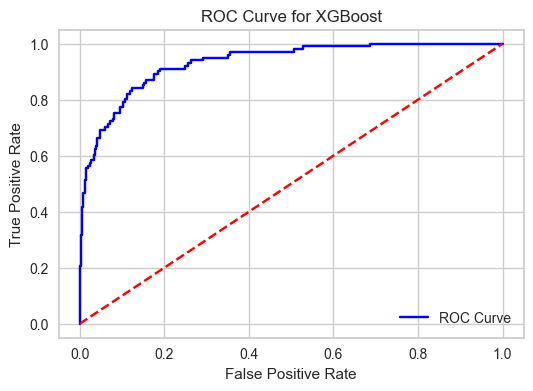

In [217]:
# 4. XG Boost model
# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train XGBoost model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', XGBClassifier(random_state=42))]) 

model.fit(X_train, y_train)

# Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  

# Evaluate model performance with different classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print(f'Confusion Matrix:\n {conf_matrix}')

# Step 11: Visualize the ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

Top 10 Most Important Features:
                      Feature  Importance
0            IP_Claims_Total    0.446614
1            OP_Claims_Total    0.090922
2         OP_total_diagnosis    0.084887
3  IP_average_claim_duration    0.062217
4         IP_total_diagnosis    0.061233
5   IP_Averagedaysinhospital    0.059377
6      OPAnnualDeductibleAmt    0.046646
7  OP_average_claim_duration    0.044078
8        IP_total_procedures    0.041709
9      IPAnnualDeductibleAmt    0.041014


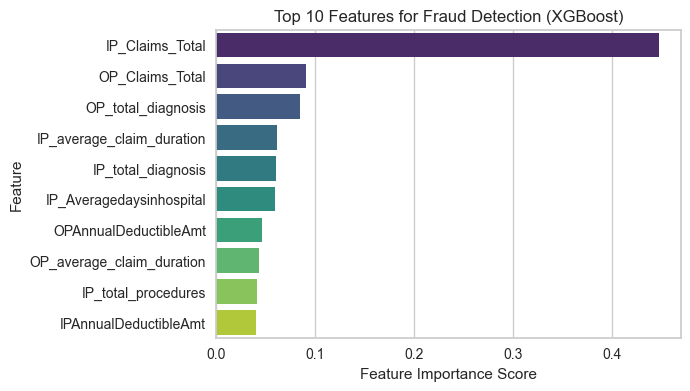

In [218]:
# Feature importance for XG Boost model
# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Extract feature importance from XGBoost
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Sort features by importance in descending order
feature_importance_df = feature_importances.sort_values(ascending=False).reset_index()
feature_importance_df.columns = ['Feature', 'Importance']

# Display the top 10 important features
top_10_features = feature_importance_df.head(10)
print("Top 10 Most Important Features:\n", top_10_features)

# Plot the top 10 features
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis',hue='Feature',legend=False)
plt.title('Top 10 Features for Fraud Detection (XGBoost)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

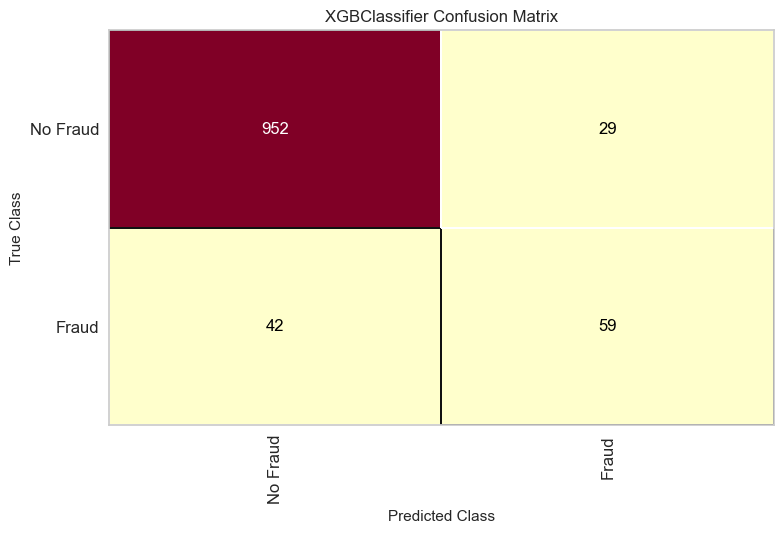

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [219]:

# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train XGBoost model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', XGBClassifier(random_state=42))])  

model.fit(X_train, y_train)

# Visualize the confusion matrix using Yellowbrick
cm_viz = ConfusionMatrix(model, classes=['No Fraud', 'Fraud'])
cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)
cm_viz.show()

Accuracy: 0.9455
Precision: 0.7500
Recall: 0.6238
F1-score: 0.6811
ROC-AUC: 0.9446
Confusion Matrix:
 [[960  21]
 [ 38  63]]


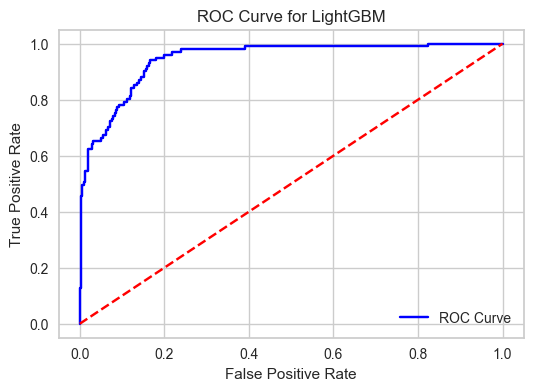

In [220]:
# 5. LightGBM model 

# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 
# Replace NaNs with 0
X_train = X_train.fillna(0)  
X_test = X_test.fillna(0)
# Replace Inf values
X_train = X_train.replace([np.inf, -np.inf], 0)  
X_test = X_test.replace([np.inf, -np.inf], 0)
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train LightGBM model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LGBMClassifier())])  

model.fit(X_train, y_train)

# Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC AUC

# Evaluate model performance with different classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print(f'Confusion Matrix:\n {conf_matrix}')

# Step 10: Visualize the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM')
plt.legend(loc='lower right')
plt.show()

Top 10 Most Important Features:
                      Feature  Importance
0      OPAnnualDeductibleAmt         319
1            IP_Claims_Total         266
2            OP_Claims_Total         253
3         IP_total_diagnosis         211
4      IPAnnualDeductibleAmt         202
5         OP_total_diagnosis         185
6  IP_average_claim_duration         102
7        IP_total_procedures          93
8  OP_average_claim_duration          42
9   IP_Averagedaysinhospital           3


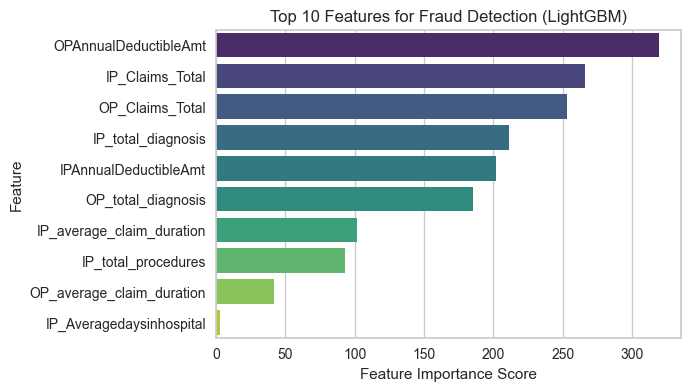

In [221]:
# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=100, max_depth=5, random_state=42)
lgb_model.fit(X_train, y_train)

# Extract feature importance from LightGBM
feature_importances = pd.Series(lgb_model.feature_importances_, index=X.columns)

# Sort features by importance in descending order
feature_importance_df = feature_importances.sort_values(ascending=False).reset_index()
feature_importance_df.columns = ['Feature', 'Importance']

# Display the top 10 important features
top_10_features = feature_importance_df.head(10)
print("Top 10 Most Important Features:\n", top_10_features)

# Plot the top 10 features
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis',hue='Feature',legend=False)
plt.title('Top 10 Features for Fraud Detection (LightGBM)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

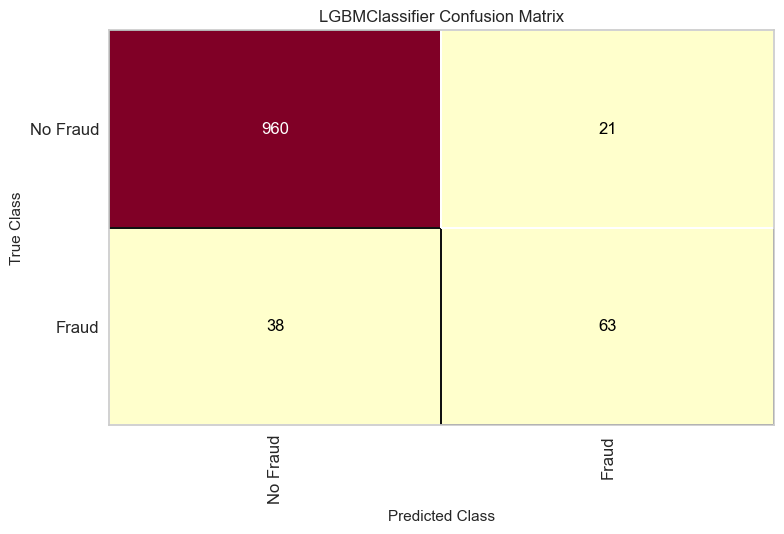

<Axes: title={'center': 'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [222]:
# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numeric values with mean
    ('scaler', StandardScaler())  # Scale numeric data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train LightGBM model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', lgb.LGBMClassifier(random_state=42))])  # Use LightGBM Classifier

model.fit(X_train, y_train)

# Visualize the confusion matrix using Yellowbrick
cm_viz = ConfusionMatrix(model, classes=['No Fraud', 'Fraud'])
cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)
cm_viz.show()

Accuracy: 0.9455
Precision: 0.7561
Recall: 0.6139
F1-score: 0.6776
ROC-AUC: 0.9527
Confusion Matrix:
 [[961  20]
 [ 39  62]]


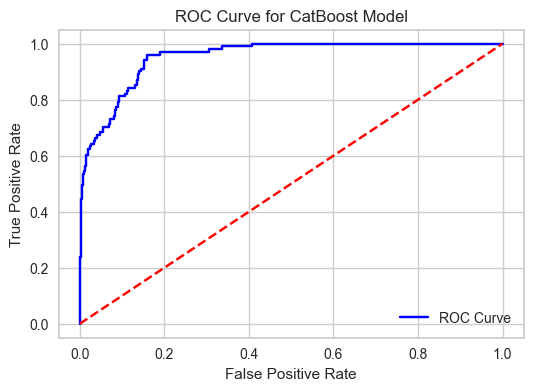

In [223]:
# 6. CAT Boost model 
#  Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

#  Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#  Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

#  Combine transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Create and train CatBoost model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', CatBoostClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, 
                                                          loss_function='Logloss', verbose=0, random_state=42))])

model.fit(X_train, y_train)

#  Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  

#  Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print(f'Confusion Matrix:\n {conf_matrix}')
#  Visualize the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost Model')
plt.legend(loc='lower right')
plt.show()

Top 10 Most Important Features:
                      Feature  Importance
0            IP_Claims_Total   17.039699
1         IP_total_diagnosis   16.807124
2            OP_Claims_Total   14.197920
3         OP_total_diagnosis   12.488184
4      OPAnnualDeductibleAmt   10.084269
5  IP_average_claim_duration    8.643085
6   IP_Averagedaysinhospital    8.229488
7        IP_total_procedures    7.165464
8      IPAnnualDeductibleAmt    4.412542
9  OP_average_claim_duration    0.661474


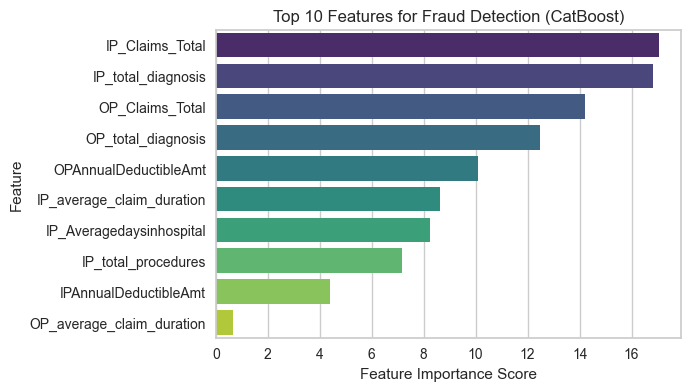

In [224]:
# Feature importance for Cat Boost 
# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train the CatBoost model
catboost_model = cb.CatBoostClassifier(iterations=100, depth=5, random_seed=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Extract feature importance from CatBoost
feature_importances = pd.Series(catboost_model.get_feature_importance(), index=X.columns)

# Sort features by importance in descending order
feature_importance_df = feature_importances.sort_values(ascending=False).reset_index()
feature_importance_df.columns = ['Feature', 'Importance']

# Display the top 10 important features
top_10_features = feature_importance_df.head(10)
print("Top 10 Most Important Features:\n", top_10_features)

# Plot the top 10 features
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis',hue='Feature',legend=False)
plt.title('Top 10 Features for Fraud Detection (CatBoost)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

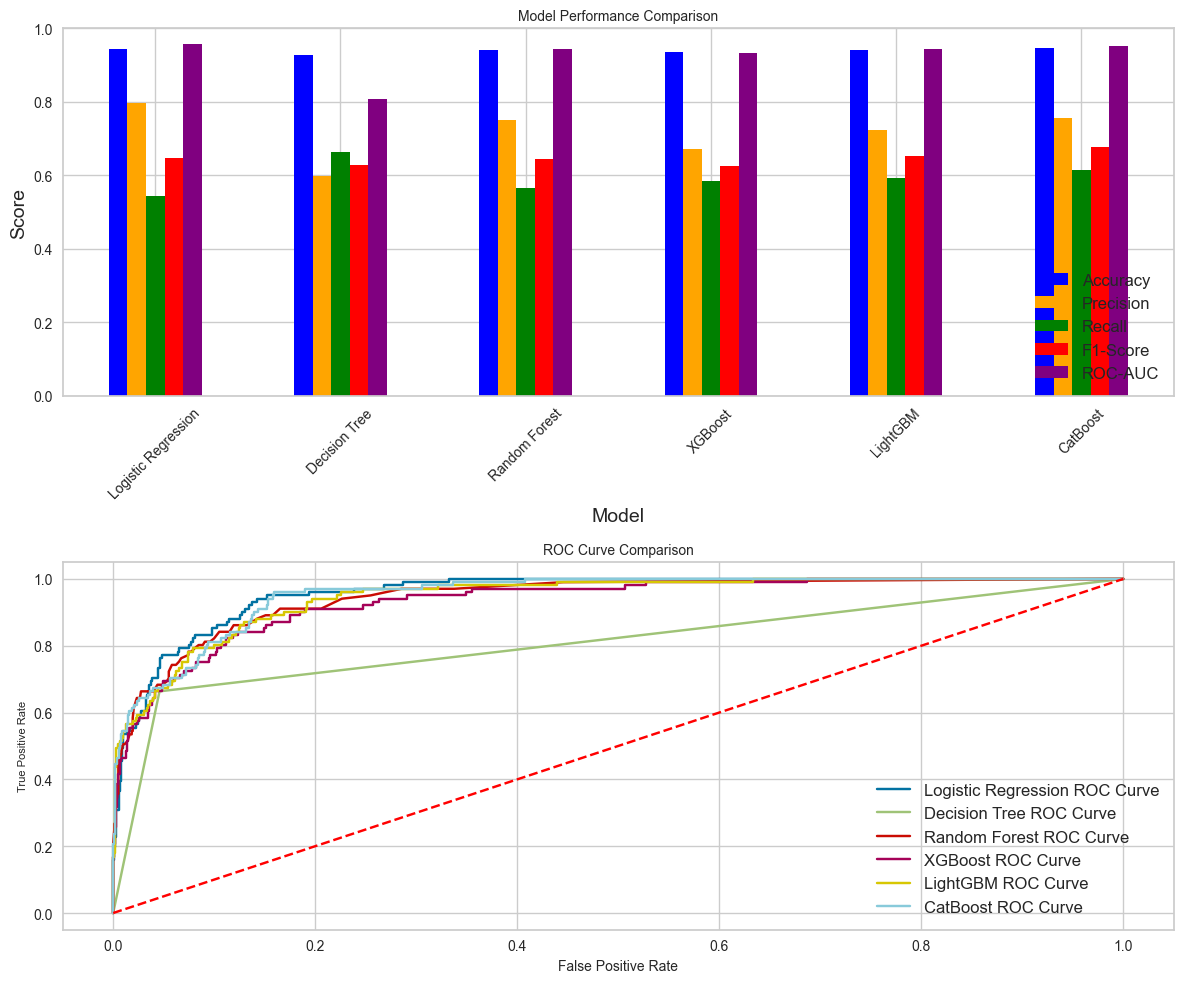

In [225]:
# Models Performance comparison 
# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0, random_state=42)
}

# To store evaluation results
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": [], "ROC-AUC": []}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Append metrics to results
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)
    metrics["ROC-AUC"].append(roc_auc)

# Convert metrics to DataFrame for easier plotting
import pandas as pd
metrics_df = pd.DataFrame(metrics)

# Plot comparison of models with a larger figure size
fig, ax = plt.subplots(2, 1, figsize=(12, 8))  

# Bar chart for comparison of evaluation metrics
metrics_df.set_index("Model").plot(kind="bar", ax=ax[0], color=['blue', 'orange', 'green', 'red', 'purple'], figsize=(12, 10))
ax[0].set_title('Model Performance Comparison', fontsize=10)
ax[0].set_ylabel('Score', fontsize=14)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel('Model', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)  # Rotate x labels for better visibility
ax[0].legend(loc='lower right', fontsize=12)

# ROC Curve Comparison
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    ax[1].plot(fpr, tpr, label=f'{name} ROC Curve')

ax[1].plot([0, 1], [0, 1], color='red', linestyle='--') 
ax[1].set_xlabel('False Positive Rate', fontsize=10)
ax[1].set_ylabel('True Positive Rate', fontsize=8)
ax[1].set_title('ROC Curve Comparison', fontsize=10)
ax[1].legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()

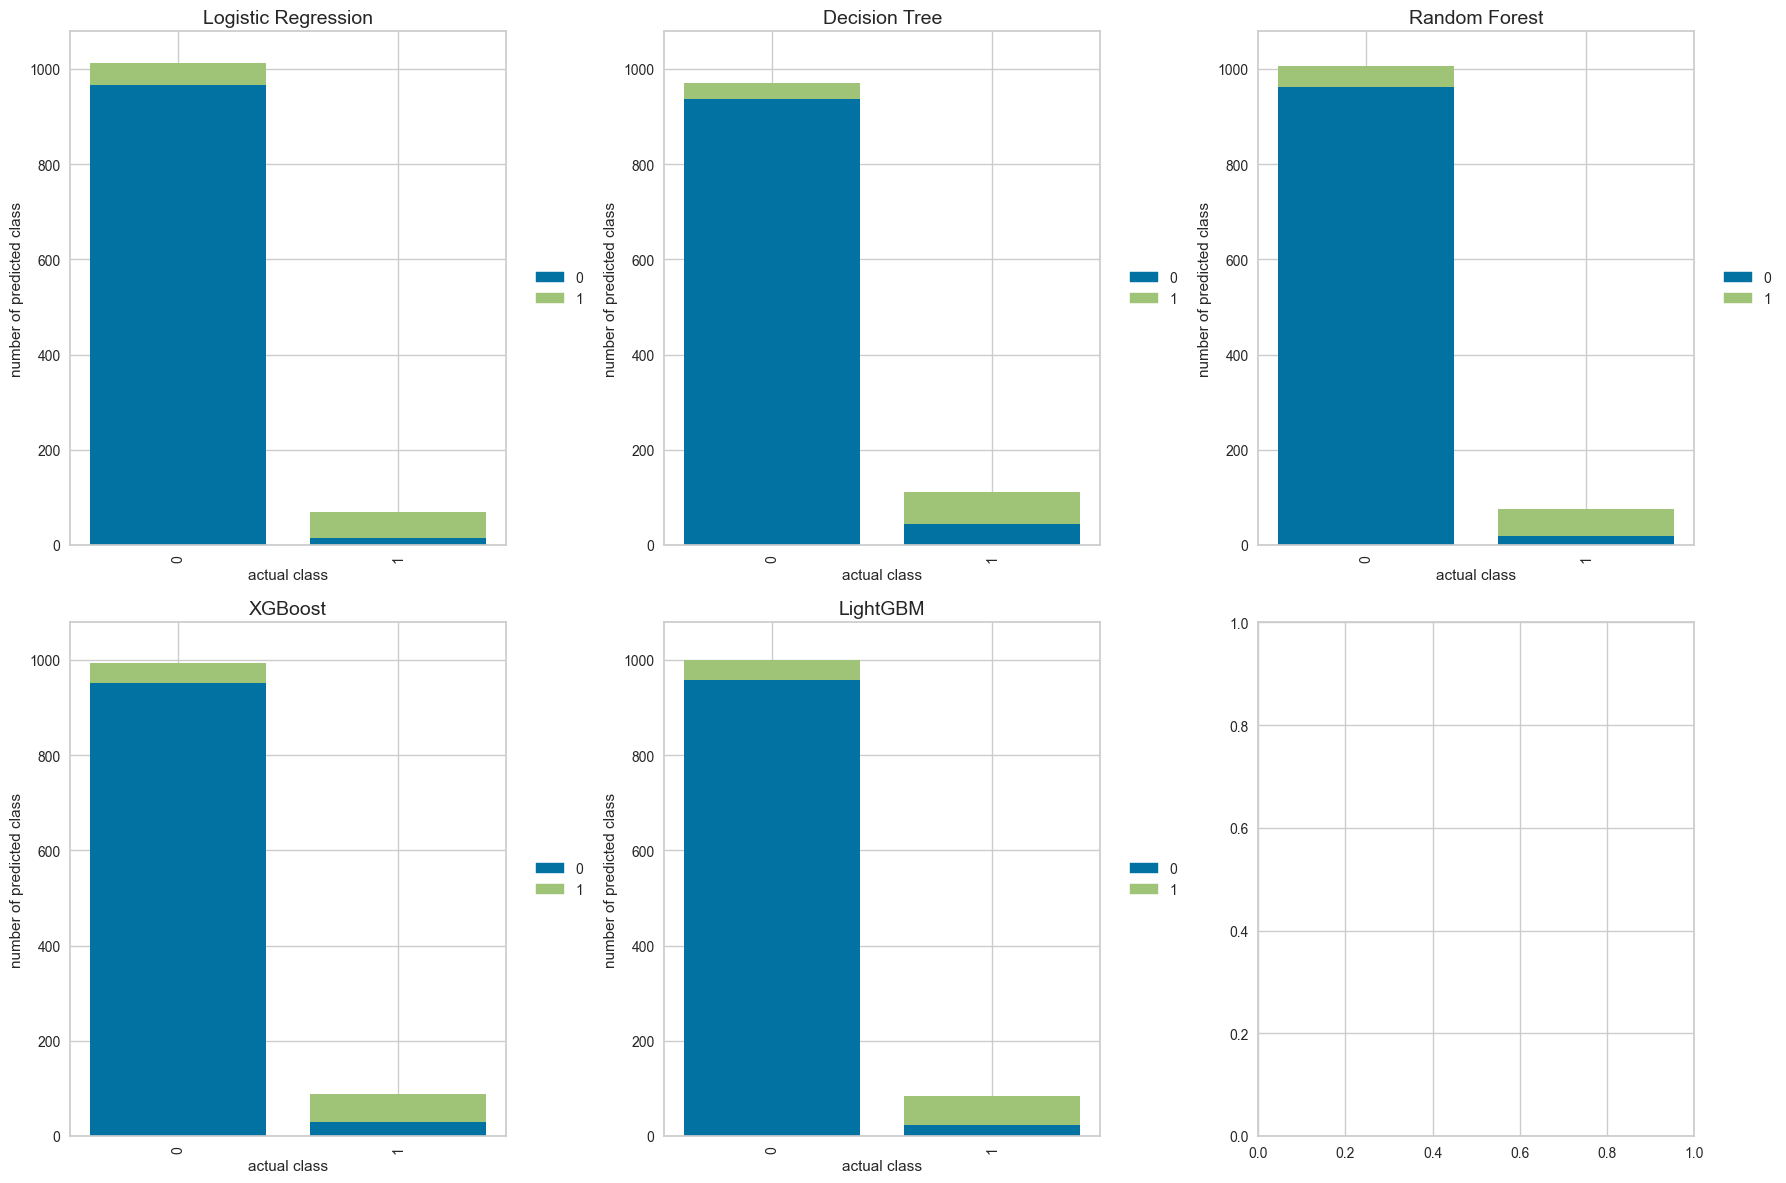

In [226]:
# Visualize the Class Prediction Error for all models using Yellowbrick
#CatBoostClassifier is not fully compatible with Yellowbrick's ClassPredictionError visualizer.
from yellowbrick.classifier import ClassPredictionError
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Define models (excluding CatBoost due to incompatibility)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),  # Removed use_label_encoder
    "LightGBM": LGBMClassifier(verbose=-1, random_state=42)  # Suppressed logs
}

# Set up the figure for visualization
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through models and plot Class Prediction Error
for i, (name, model) in enumerate(models.items()):
    visualizer = ClassPredictionError(model, ax=axes[i])  # Create the visualizer
    model.fit(X_train, y_train)  # Train model
    visualizer.fit(X_train, y_train)  # Fit visualizer
    visualizer.score(X_test, y_test)  # Evaluate on test data
    visualizer.finalize()
    axes[i].set_title(name, fontsize=14)  # Set individual plot titles

plt.tight_layout()
plt.show()

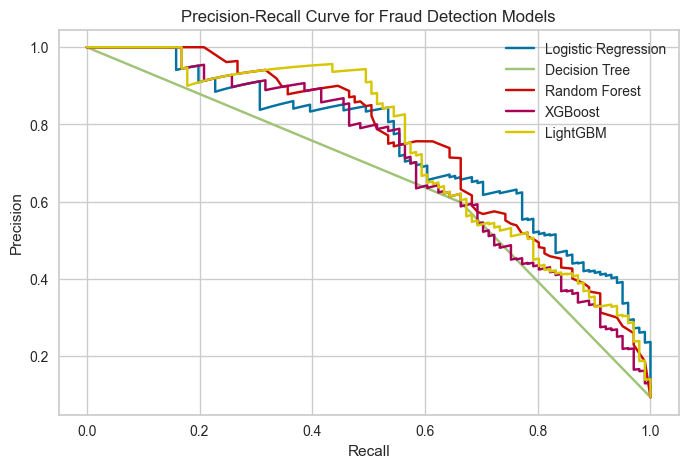

In [227]:
# Precision-Recall Curve
# Useful when dealing with imbalanced data. Highlights trade-off between precision and recall.Evaluates imbalanced fraud detection.
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    plt.plot(recall, precision, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Fraud Detection Models")
plt.legend()
plt.show()

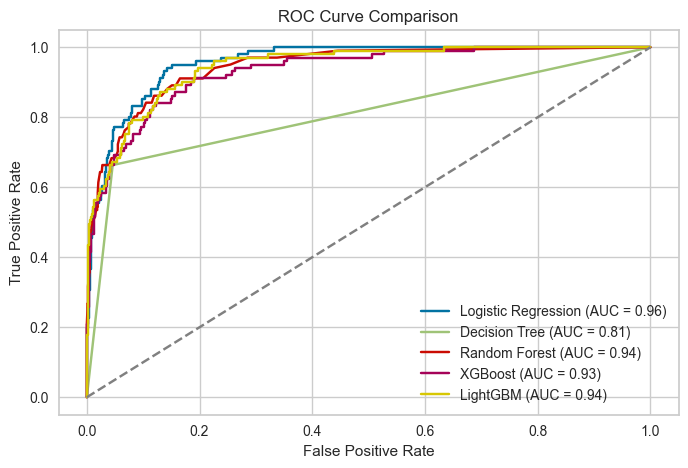

In [228]:
#ROC Curve Comparison
# Shows true positive rate (TPR) vs. false positive rate (FPR). Helps visualize classification threshold effectiveness.
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 5))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

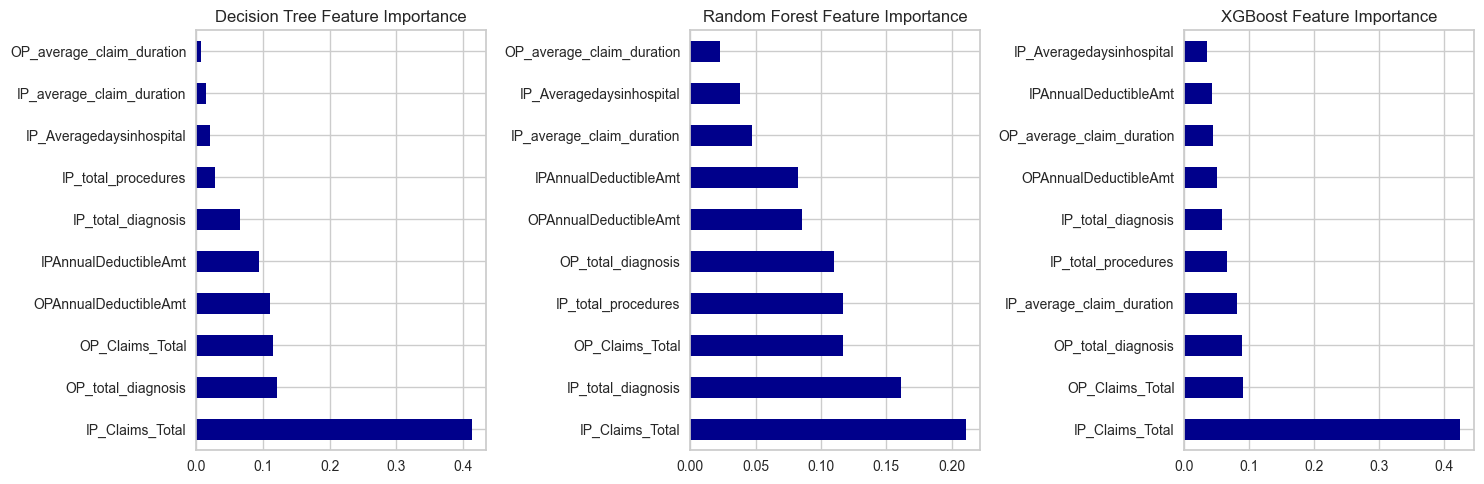

In [229]:
# Feature Importance (Tree-Based Models)
# Highlights key predictors in fraud detection.
import pandas as pd

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # For three tree-based models
tree_models = ["Decision Tree", "Random Forest", "XGBoost"]

for i, name in enumerate(tree_models):
    model = models[name]
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]
    features = X.columns[indices]

    pd.Series(importances[indices], index=features).head(10).plot(kind='barh', ax=axes[i], color='darkblue')
    axes[i].set_title(f"{name} Feature Importance")

plt.tight_layout()
plt.show()

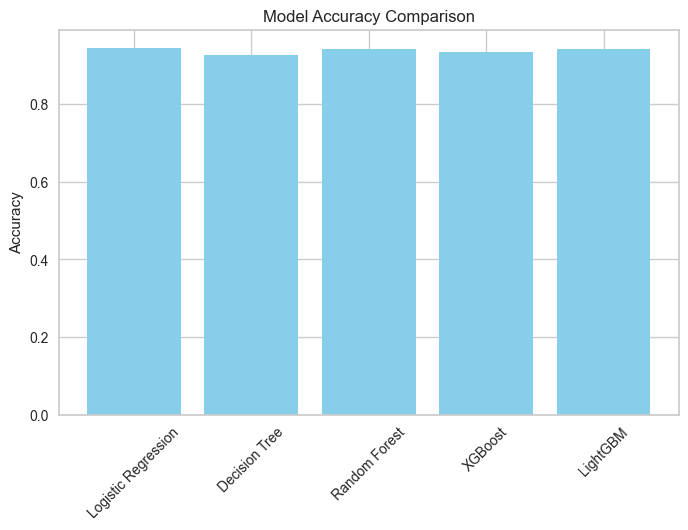

In [230]:
# Model Accuracy Comparison (Bar Chart)
#Quick comparison of accuracy across models.
accuracies = {name: model.score(X_test, y_test) for name, model in models.items()}
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color="skyblue")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

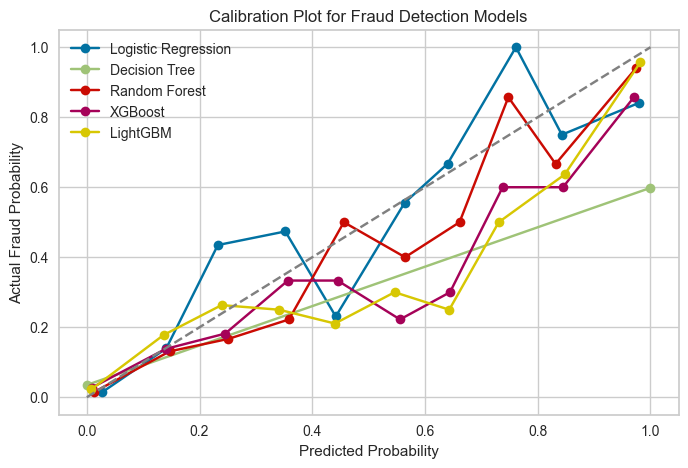

In [231]:
# Calibration Plot
# Measures how well predicted probabilities match actual fraud occurrence(probability reliability).
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 5))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
    plt.plot(prob_pred, prob_true, marker="o", label=name)

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Fraud Probability")
plt.title("Calibration Plot for Fraud Detection Models")
plt.legend()
plt.show()

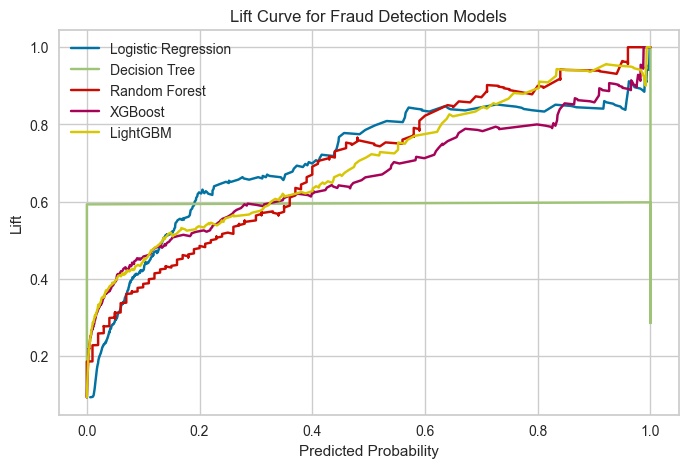

In [232]:
# Lift Curve
# Measures how much better the model performs(effectiveness) than random guessing

plt.figure(figsize=(8, 5))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (fraud)
    
    # Get the sorted indices of predicted probabilities
    sorted_indices = np.argsort(y_probs)[::-1]
    
    # Sort y_test and y_probs based on the sorted indices
    sorted_y_test = y_test.iloc[sorted_indices]
    sorted_probs = y_probs[sorted_indices]
    
    # Calculate the lift
    lift = np.cumsum(sorted_y_test) / np.arange(1, len(y_test) + 1)
    
    # Plot lift curve
    plt.plot(sorted_probs, lift, label=name)

plt.xlabel("Predicted Probability")
plt.ylabel("Lift")
plt.title("Lift Curve for Fraud Detection Models")
plt.legend()
plt.show()

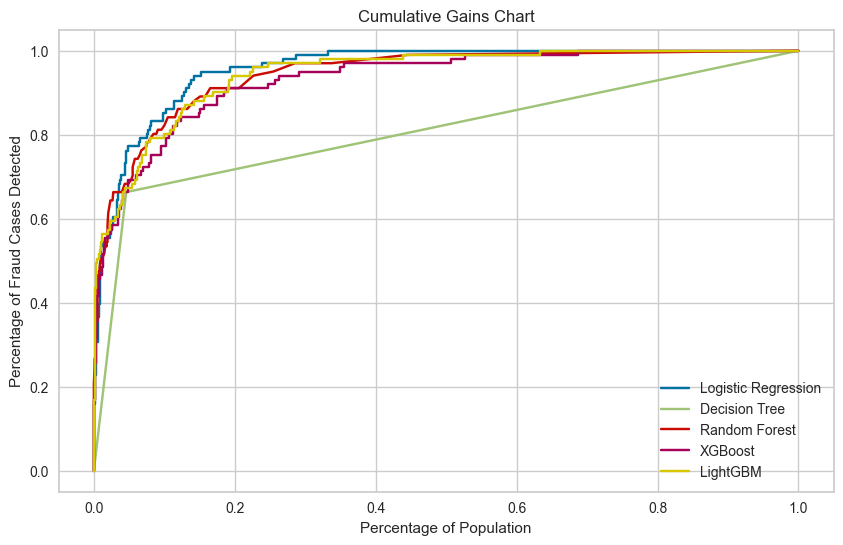

In [233]:
# Cumulative Gains Chart
# Shows how many fraud cases are detected at different cut-off levels.Tracks fraud detection rates.
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=name)

plt.xlabel("Percentage of Population")
plt.ylabel("Percentage of Fraud Cases Detected")
plt.title("Cumulative Gains Chart")
plt.legend()
plt.show()

                                Accuracy  Precision    Recall  F1-score   AUC-ROC
Logistic Regression             0.930376   0.773810  0.408805  0.534979  0.943534
Logistic Regression (Balanced)  0.889710   0.464286  0.817610  0.592255  0.943495


<Figure size 800x600 with 0 Axes>

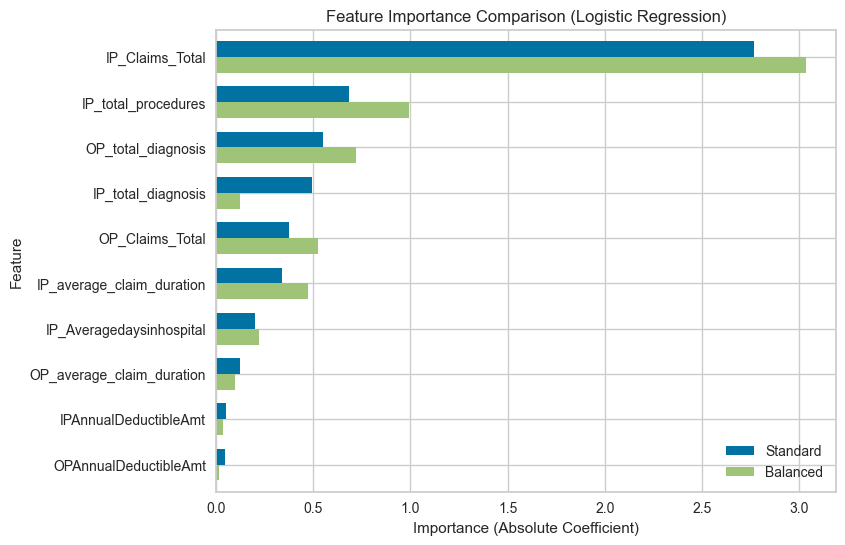

In [234]:
# Comparison between logistic regression without and with class-weight='Balance'
# Define features and target variable
X=df.drop(columns=['Provider','PotentialFraud'])
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values using median
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test_imputed.columns)

# Train Logistic Regression without class_weight
log_reg_standard = LogisticRegression(max_iter=5000, solver='saga', random_state=42)
log_reg_standard.fit(X_train_scaled, y_train)

# Train Logistic Regression with class_weight='balanced'
log_reg_balanced = LogisticRegression(class_weight='balanced', max_iter=5000, solver='saga', random_state=42)
log_reg_balanced.fit(X_train_scaled, y_train)

# Predictions
y_pred_standard = log_reg_standard.predict(X_test_scaled)
y_pred_balanced = log_reg_balanced.predict(X_test_scaled)

# Compute Metrics
metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_standard), accuracy_score(y_test, y_pred_balanced)],
    "Precision": [precision_score(y_test, y_pred_standard), precision_score(y_test, y_pred_balanced)],
    "Recall": [recall_score(y_test, y_pred_standard), recall_score(y_test, y_pred_balanced)],
    "F1-score": [f1_score(y_test, y_pred_standard), f1_score(y_test, y_pred_balanced)],
    "AUC-ROC": [roc_auc_score(y_test, log_reg_standard.predict_proba(X_test_scaled)[:, 1]),
                roc_auc_score(y_test, log_reg_balanced.predict_proba(X_test_scaled)[:, 1])]
};

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics, index=['Logistic Regression', 'Logistic Regression (Balanced)'])
print(metrics_df)

# Feature Importance Comparison
coefficients_standard = abs(log_reg_standard.coef_[0])
coefficients_balanced = abs(log_reg_balanced.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Standard': coefficients_standard,
    'Balanced': coefficients_balanced
}).sort_values(by='Standard', ascending=False);

# Plot Feature Importance
plt.figure(figsize=(8, 6))
ax = feature_importance_df.head(10).plot(kind='barh', x='Feature', figsize=(8, 6), width=0.7)
plt.title('Feature Importance Comparison (Logistic Regression)')
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.legend(['Standard', 'Balanced'])
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.show();


Logistic Regression (No Class Weight)
Accuracy: 0.9445
Precision: 0.7971
Recall: 0.5446
F1-score: 0.6471
ROC-AUC: 0.9576
Confusion Matrix:
 [[967  14]
 [ 46  55]]


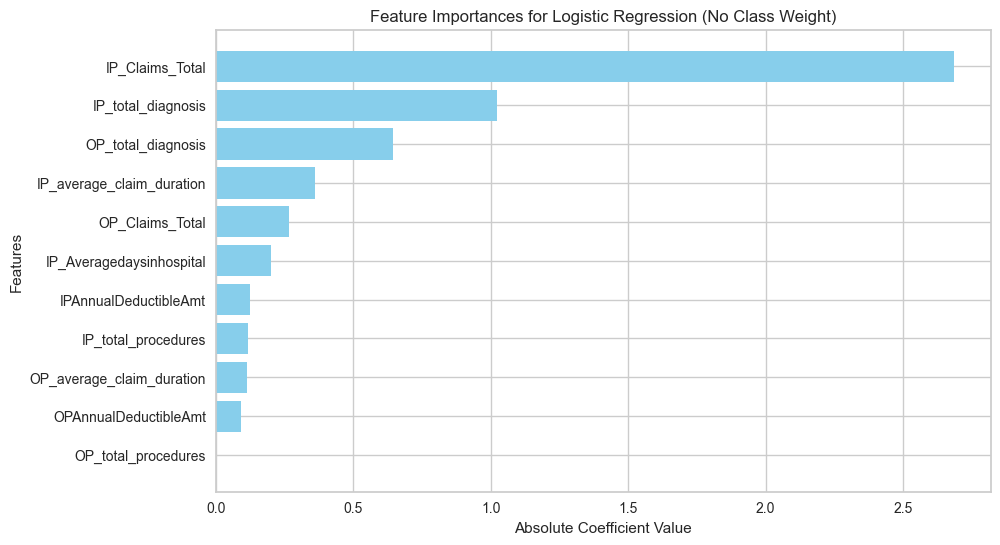


Logistic Regression (With Class Weight Balanced)
Accuracy: 0.8734
Precision: 0.4167
Recall: 0.8911
F1-score: 0.5678
ROC-AUC: 0.9583
Confusion Matrix:
 [[855 126]
 [ 11  90]]


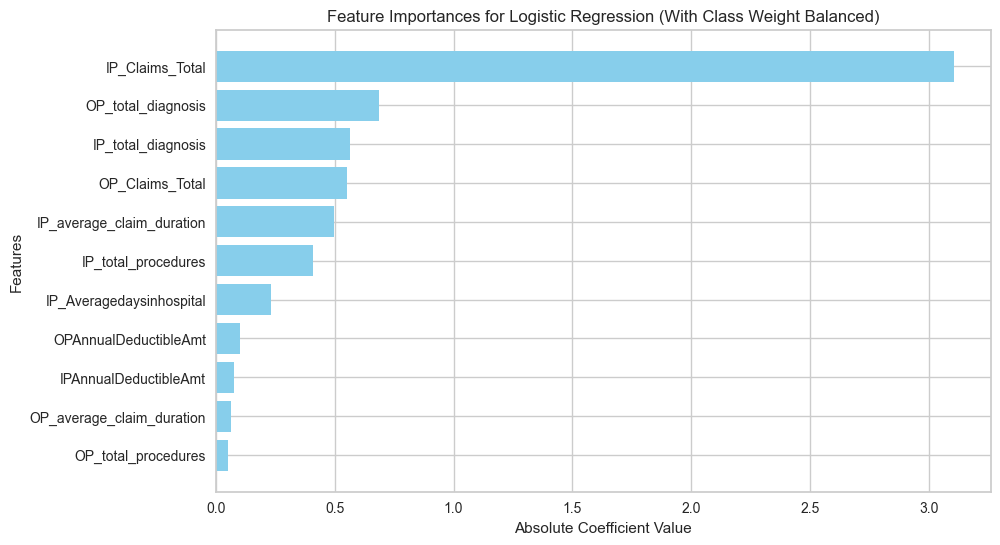

                                              Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0             Logistic Regression (No Class Weight)  0.944547   0.797101  0.544554  0.647059  0.957631
1  Logistic Regression (With Class Weight Balanced)  0.873383   0.416667  0.891089  0.567823  0.958287


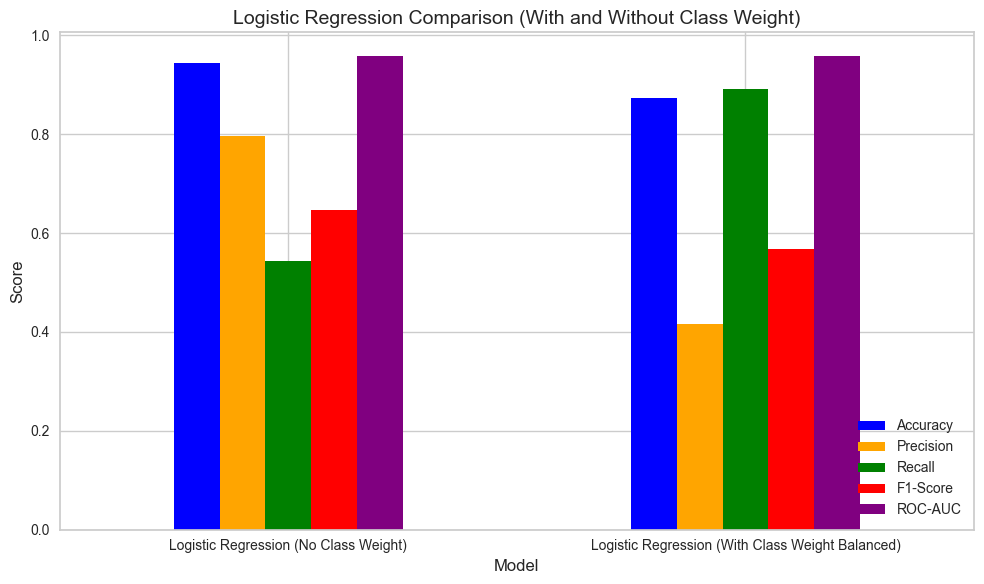

In [235]:
#Comparison between Logistic Regression with and without class_weight
# Define features and target variable
X = df.drop(columns=['Provider','PotentialFraud'])
y = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define models: Logistic Regression with and without class_weight='balanced'
models = {
    "Logistic Regression (No Class Weight)": LogisticRegression(max_iter=1000, random_state=42),
    "Logistic Regression (With Class Weight Balanced)": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
}

# To store evaluation results
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": [], "ROC-AUC": []}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to results
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)
    metrics["ROC-AUC"].append(roc_auc)

    # Print evaluation metrics
    print(f'\n{name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')
    print(f'Confusion Matrix:\n {conf_matrix}')


    # Feature Importance (coefficients for Logistic Regression)
    feature_importance = np.abs(model.coef_[0])
    feature_names = X.columns
    sorted_idx = np.argsort(feature_importance)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx], color='skyblue')
    plt.title(f'Feature Importances for {name}')
    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Features')
    plt.show()

# Convert metrics to DataFrame for easier comparison
import pandas as pd
metrics_df = pd.DataFrame(metrics)

# Print the metrics DataFrame
print(metrics_df)

# Optional: Plot the comparison of metrics
metrics_df.set_index("Model").plot(kind="bar", figsize=(10, 6), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Logistic Regression Comparison (With and Without Class Weight)', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

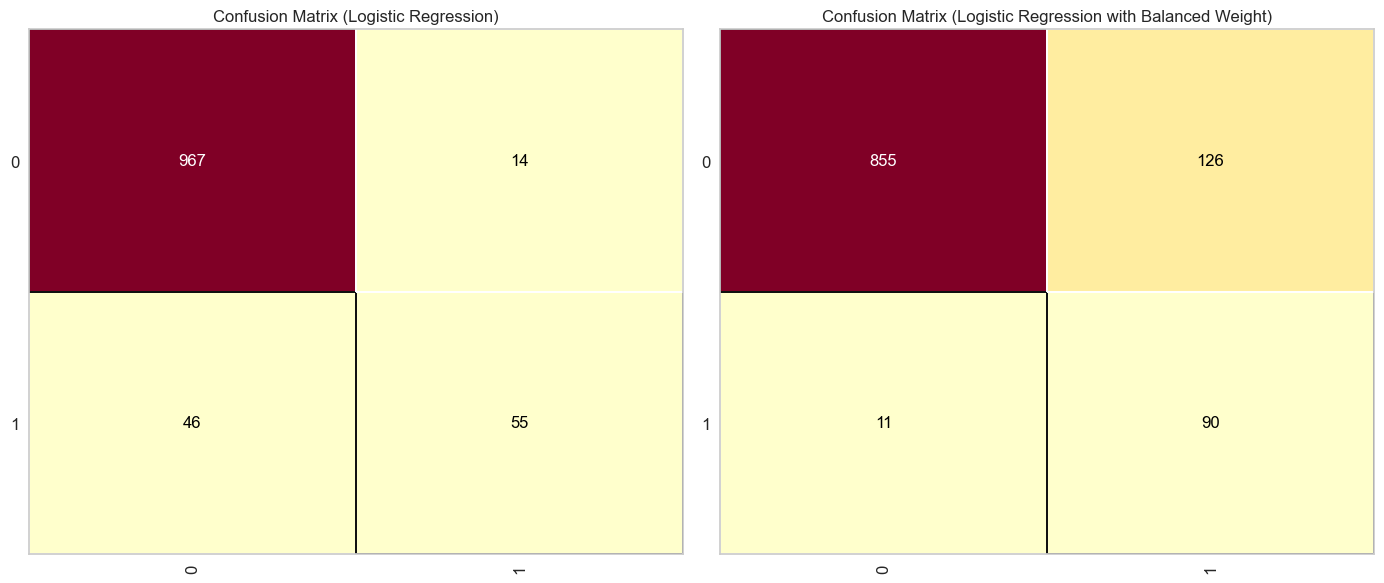

Standard Logistic Regression Metrics:
Accuracy: 0.9445
Precision: 0.7971
Recall: 0.5446
F1-score: 0.6471
ROC-AUC: 0.9576

Logistic Regression with Balanced Weight Metrics:
Accuracy: 0.8734
Precision: 0.4167
Recall: 0.8911
F1-score: 0.5678
ROC-AUC: 0.9583


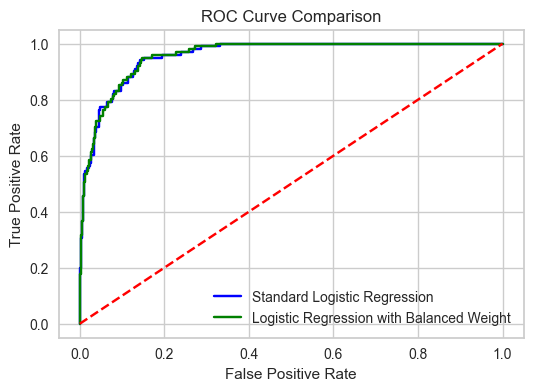

In [236]:
# Comparison between Logistic Regression with and without class_weight
# Define features and target variable
X = df.drop(columns=['Provider','PotentialFraud'])
y = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train two models: one without class_weight and one with class_weight='balanced'
log_reg_standard = LogisticRegression(max_iter=1000, random_state=42)
log_reg_standard.fit(X_train, y_train)

log_reg_balanced = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_balanced.fit(X_train, y_train)

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualize confusion matrix for standard Logistic Regression
cm_standard_viz = ConfusionMatrix(log_reg_standard, ax=axes[0])
cm_standard_viz.fit(X_train, y_train)
cm_standard_viz.score(X_test, y_test)
axes[0].set_title('Confusion Matrix (Logistic Regression)')

# Visualize confusion matrix for Logistic Regression with class_weight='balanced'
cm_balanced_viz = ConfusionMatrix(log_reg_balanced, ax=axes[1])
cm_balanced_viz.fit(X_train, y_train)
cm_balanced_viz.score(X_test, y_test)
axes[1].set_title('Confusion Matrix (Logistic Regression with Balanced Weight)')

# Display the confusion matrices
fig.tight_layout()
plt.show()

# Predictions for evaluation metrics (standard logistic regression)
y_pred_standard = log_reg_standard.predict(X_test)
y_prob_standard = log_reg_standard.predict_proba(X_test)[:, 1]

# Compute evaluation metrics for standard logistic regression
accuracy_standard = accuracy_score(y_test, y_pred_standard)
precision_standard = precision_score(y_test, y_pred_standard)
recall_standard = recall_score(y_test, y_pred_standard)
f1_standard = f1_score(y_test, y_pred_standard)
roc_auc_standard = roc_auc_score(y_test, y_prob_standard)

print(f"Standard Logistic Regression Metrics:")
print(f'Accuracy: {accuracy_standard:.4f}')
print(f'Precision: {precision_standard:.4f}')
print(f'Recall: {recall_standard:.4f}')
print(f'F1-score: {f1_standard:.4f}')
print(f'ROC-AUC: {roc_auc_standard:.4f}')

# Predictions for logistic regression with class_weight='balanced'
y_pred_balanced = log_reg_balanced.predict(X_test)
y_prob_balanced = log_reg_balanced.predict_proba(X_test)[:, 1]

# Compute evaluation metrics for logistic regression with class_weight='balanced'
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_prob_balanced)

print(f"\nLogistic Regression with Balanced Weight Metrics:")
print(f'Accuracy: {accuracy_balanced:.4f}')
print(f'Precision: {precision_balanced:.4f}')
print(f'Recall: {recall_balanced:.4f}')
print(f'F1-score: {f1_balanced:.4f}')
print(f'ROC-AUC: {roc_auc_balanced:.4f}')

# Visualize ROC Curve for comparison
fpr_standard, tpr_standard, thresholds_standard = roc_curve(y_test, y_prob_standard)
fpr_balanced, tpr_balanced, thresholds_balanced = roc_curve(y_test, y_prob_balanced)

plt.figure(figsize=(6, 4))
plt.plot(fpr_standard, tpr_standard, color='blue', label='Standard Logistic Regression')
plt.plot(fpr_balanced, tpr_balanced, color='green', label='Logistic Regression with Balanced Weight')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.944547   0.797101  0.544554  0.647059  0.957631
1        Decision Tree  0.926987   0.598214  0.663366  0.629108  0.808747
2        Random Forest  0.941774   0.750000  0.564356  0.644068  0.944641
3              XGBoost  0.934381   0.670455  0.584158  0.624339  0.932439
4             LightGBM  0.940850   0.722892  0.594059  0.652174  0.944813
5             CatBoost  0.945471   0.756098  0.613861  0.677596  0.952695


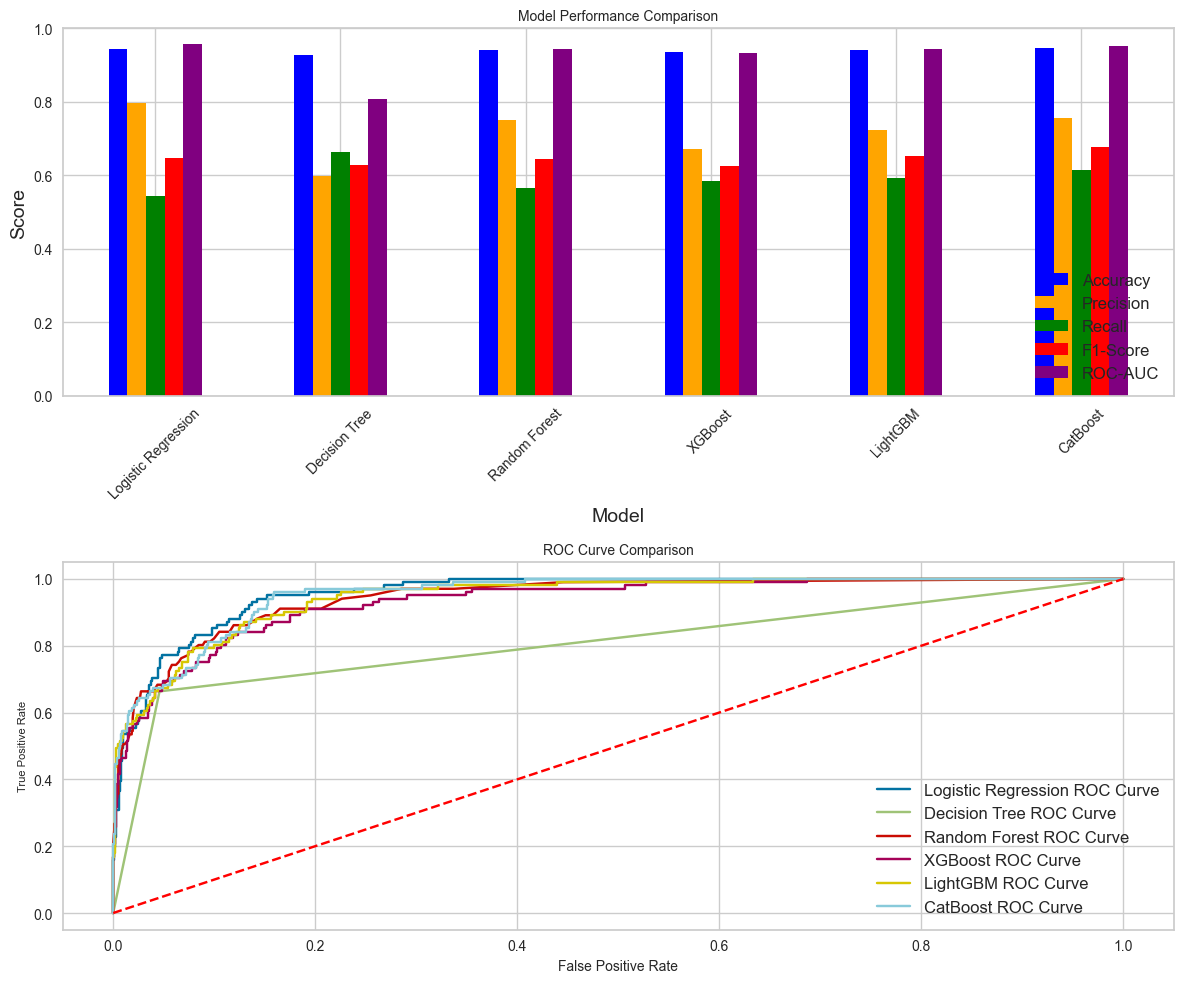

In [237]:
# Models performance comparison
# Define features and target variable
X = df.drop(columns=['Provider','PotentialFraud'])
y = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0, random_state=42)
}

# To store evaluation results
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": [], "ROC-AUC": []}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Append metrics to results
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)
    metrics["ROC-AUC"].append(roc_auc)

# Convert metrics to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)

# Display the comparison table
print(metrics_df)

# Plot comparison of models with a larger figure size
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Bar chart for comparison of evaluation metrics
metrics_df.set_index("Model").plot(kind="bar", ax=ax[0], color=['blue', 'orange', 'green', 'red', 'purple'], figsize=(12, 10))
ax[0].set_title('Model Performance Comparison', fontsize=10)
ax[0].set_ylabel('Score', fontsize=14)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel('Model', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)  # Rotate x labels for better visibility
ax[0].legend(loc='lower right', fontsize=12)

# ROC Curve Comparison
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    ax[1].plot(fpr, tpr, label=f'{name} ROC Curve')

ax[1].plot([0, 1], [0, 1], color='red', linestyle='--') 
ax[1].set_xlabel('False Positive Rate', fontsize=10)
ax[1].set_ylabel('True Positive Rate', fontsize=8)
ax[1].set_title('ROC Curve Comparison', fontsize=10)
ax[1].legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.944547   0.797101  0.544554  0.647059  0.957631
5             CatBoost  0.945471   0.756098  0.613861  0.677596  0.952695
4             LightGBM  0.940850   0.722892  0.594059  0.652174  0.944813
2        Random Forest  0.941774   0.750000  0.564356  0.644068  0.944641
3              XGBoost  0.934381   0.670455  0.584158  0.624339  0.932439
1        Decision Tree  0.926987   0.598214  0.663366  0.629108  0.808747


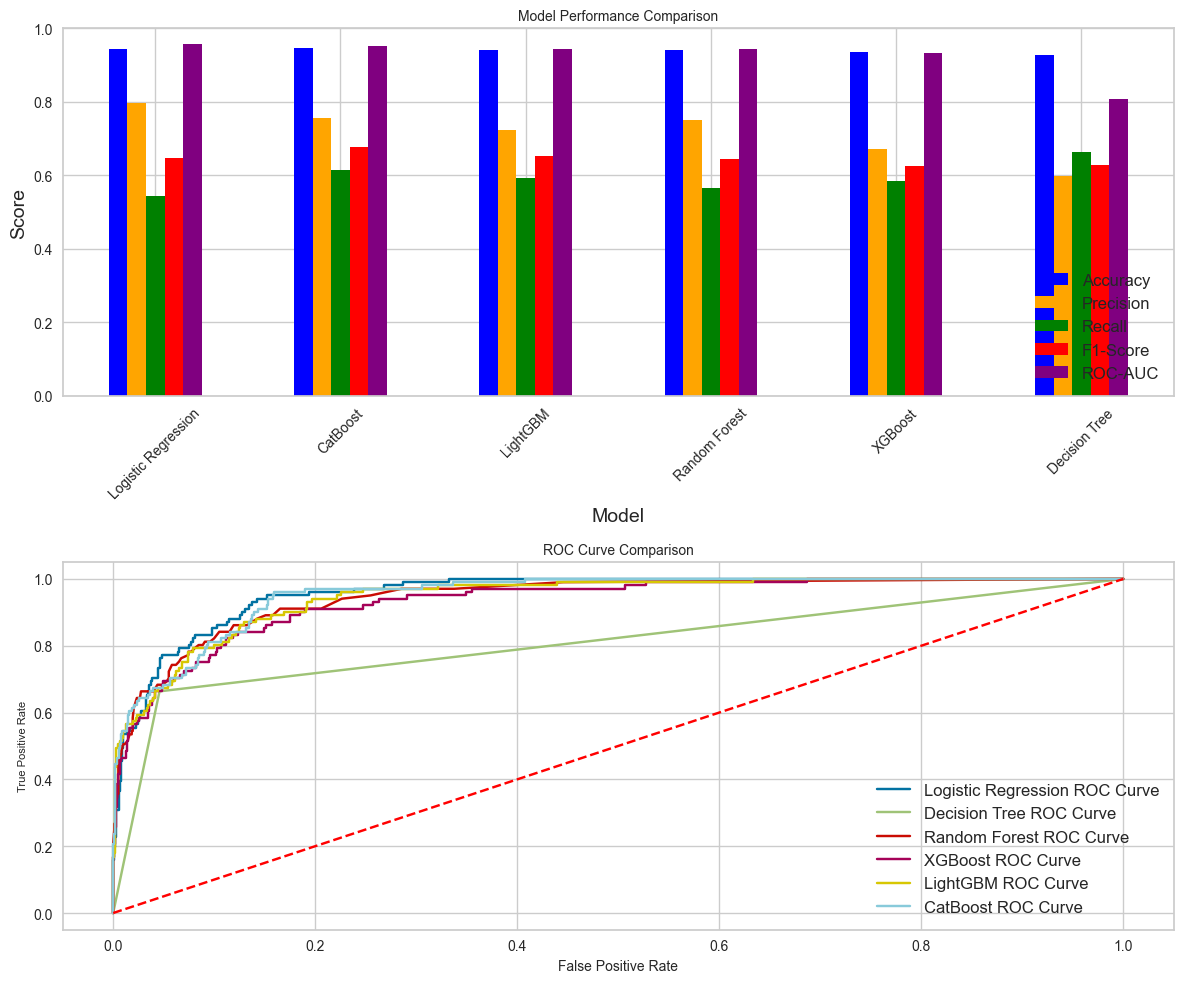

In [238]:
# Sort the metrics DataFrame by ROC-AUC in descending order
metrics_df_sorted = metrics_df.sort_values(by="ROC-AUC", ascending=False)

# Display the sorted table
print(metrics_df_sorted)

# Plot comparison of models with a larger figure size
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Bar chart for comparison of evaluation metrics
metrics_df_sorted.set_index("Model").plot(kind="bar", ax=ax[0], color=['blue', 'orange', 'green', 'red', 'purple'], figsize=(12, 10))
ax[0].set_title('Model Performance Comparison', fontsize=10)
ax[0].set_ylabel('Score', fontsize=14)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel('Model', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)  # Rotate x labels for better visibility
ax[0].legend(loc='lower right', fontsize=12)

# ROC Curve Comparison
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    ax[1].plot(fpr, tpr, label=f'{name} ROC Curve')

ax[1].plot([0, 1], [0, 1], color='red', linestyle='--') 
ax[1].set_xlabel('False Positive Rate', fontsize=10)
ax[1].set_ylabel('True Positive Rate', fontsize=8)
ax[1].set_title('ROC Curve Comparison', fontsize=10)
ax[1].legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()